
<h1 style="color: Black; font-size: 26px;border-bottom: 2px solid gray;padding: 10px; text-align: center;">India's Loksabha Election 2014,2019 analysis</h1>


<h2 style="color: green; font-family: Arial; font-size: 20px; border-bottom: 2px solid gray; padding: 10px;">
    Importing Libraries
</h2>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2 style="color: green; font-family: Arial; font-size: 20px; border-bottom: 2px solid gray; padding: 10px;">
    Importing Datasets
</h2>


In [2]:
df_2014=pd.read_csv("D:\Python projects\India_election_analysis\datasets\constituency_wise_results_2014.csv")

In [3]:
df_2014.head(3)

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Andhra Pradesh,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282
1,Andhra Pradesh,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282
2,Andhra Pradesh,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,184198,1386282


In [4]:
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8355 entries, 0 to 8354
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           8355 non-null   object 
 1   pc_name         8355 non-null   object 
 2   candidate       8355 non-null   object 
 3   sex             7845 non-null   object 
 4   age             7845 non-null   float64
 5   category        7845 non-null   object 
 6   party           8355 non-null   object 
 7   party_symbol    8355 non-null   object 
 8   general_votes   8355 non-null   int64  
 9   postal_votes    8355 non-null   int64  
 10  total_votes     8355 non-null   int64  
 11  total_electors  8355 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 783.4+ KB


In [5]:
df_2014.describe()

,age,general_votes,postal_votes,total_votes,total_electors
count,7845.000000,8355.000000,8355.000000,8355.000000,8.355000e+03
mean,47.135883,62132.985398,107.407660,62240.393058,1.574132e+06
std,11.902487,140261.650370,436.090305,140535.827087,2.711797e+05
min,25.000000,105.000000,0.000000,105.000000,4.992200e+04
25%,38.000000,1708.000000,0.000000,1708.500000,1.446478e+06
50%,46.000000,4350.000000,1.000000,4354.000000,1.578125e+06
75%,56.000000,14881.000000,13.000000,14886.000000,1.718414e+06
max,93.000000,859973.000000,6792.000000,863358.000000,3.183083e+06


In [6]:
df_2014.describe(include=object)

,state,pc_name,candidate,sex,category,party,party_symbol
count,8355,8355,8355,7845,7845,8355,8355
unique,33,508,7563,3,4,453,131
top,Uttar Pradesh,Chennai South,None of the Above,M,GEN,IND,NOTA
freq,1368,43,511,7209,5318,3096,511


In [7]:
df_2014.head(2)

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Andhra Pradesh,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282
1,Andhra Pradesh,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282


In [8]:
#checking if each constituency has unique party_symbol

x=df_2014.groupby(['state','pc_name'])
for i,j in x:
    if j['party_symbol'].nunique()!=len(j):
        print(f'{i} has two same party symbol')
    

In [9]:
#checking duplicate names
d=df_2014['candidate'].value_counts()
x=d[d>=3]
x

candidate
None of the Above    511
ANIL KUMAR            11
ASHOK KUMAR           10
VIJAY KUMAR            9
MANOJ KUMAR            7
RAJESH KUMAR           7
SANJAY KUMAR           6
OM PRAKASH             5
JARNAIL SINGH          5
RAKESH                 5
SANTOSH KUMAR          5
SUNIL KUMAR            5
DEEPAK KUMAR           5
RAKESH KUMAR           4
SURESH                 4
SATISH KUMAR           4
JAGDISH                4
RAM SINGH              4
DINESH KUMAR           4
RAJESH                 4
ARUN KUMAR             4
AMAR SINGH             4
MAHENDRA KUMAR         4
AJAY KUMAR             4
KISHAN LAL             3
ANIL KUMAR SHARMA      3
BABULAL                3
GURNAM SINGH           3
PAWAN KUMAR            3
RANJAN KUMAR           3
JASWANT SINGH          3
MAHESH                 3
ASHOK                  3
PRADEEP KUMAR          3
ANIL                   3
JAI SINGH              3
SHIV KUMAR             3
RAMESH                 3
ARVIND                 3
SUNIL          

In [10]:
x=df_2014[df_2014['candidate']=="None of the Above"]
x.shape

(511, 12)

In [11]:
df_2014['sex'].unique()

array(['M', nan, 'F', 'O'], dtype=object)

In [12]:
#checking candidate which is "None of the Above" but sex column is not blank


df_2014[(df_2014['candidate']=="None of the Above")&(df_2014['sex'].notna())]

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
5416,Tamil Nadu,Nilgiris,None of the Above,M,NaN,NaN,NOTA,NOTA,46495,64,46559,1269173


In [13]:
# making sure every candidate which is "None of the Above" has NaN in the sex column

import numpy as np
def ff(row):
    if row['candidate']=="None of the Above":
        row['sex']=np.nan
        row['age']=np.nan
        row['category']=np.nan
    return row

df_2014=df_2014.apply(ff,axis=1)

In [14]:
df_2014.iloc[5416]

state                    Tamil Nadu
pc_name                   Nilgiris 
candidate         None of the Above
sex                             NaN
age                             NaN
category                        NaN
party                          NOTA
party_symbol                   NOTA
general_votes                 46495
postal_votes                     64
total_votes                   46559
total_electors              1269173
Name: 5416, dtype: object

In [15]:
##Adding year column in dataframe
df_2014['year']=2014
df_2014.head(3)

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors,year
0,Andhra Pradesh,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282,2014
1,Andhra Pradesh,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282,2014
2,Andhra Pradesh,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,184198,1386282,2014


In [16]:
col_a=[]
for columns in df_2014.columns:
    if columns!='year':
        col_a.append(columns)


col_b=['year']

col=col_b+col_a
df_2014=df_2014[col]
df_2014.head(2)

,year,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,2014,Andhra Pradesh,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282
1,2014,Andhra Pradesh,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282


<h2 style="color: green; font-family: Arial; font-size: 20px; border-bottom: 2px solid gray; padding: 10px;">
    Importing Dataset 2019
</h2>


In [17]:
df_2019=pd.read_csv("D:\Python projects\India_election_analysis\datasets\constituency_wise_results_2019.csv")
df_2019.head(3)

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Andhra Pradesh,Aruku,KISHORE CHANDRA DEO,MALE,72.0,ST,TDP,Bicycle,336163,1938,338101,1451418
1,Andhra Pradesh,Aruku,Dr. KOSURI KASI VISWANADHA VEERA VENKATA SATYA...,MALE,54.0,ST,BJP,Lotus,17578,289,17867,1451418
2,Andhra Pradesh,Aruku,GODDETI. MADHAVI,FEMALE,26.0,ST,YSRCP,Ceiling Fan,557561,4629,562190,1451418


In [18]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8597 entries, 0 to 8596
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           8597 non-null   object 
 1   pc_name         8597 non-null   object 
 2   candidate       8597 non-null   object 
 3   sex             8054 non-null   object 
 4   age             8054 non-null   float64
 5   category        8054 non-null   object 
 6   party           8597 non-null   object 
 7   party_symbol    8054 non-null   object 
 8   general_votes   8597 non-null   int64  
 9   postal_votes    8597 non-null   int64  
 10  total_votes     8597 non-null   int64  
 11  total_electors  8597 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 806.1+ KB


In [19]:
df_2019['candidate'].value_counts()

candidate
NOTA                    543
SUNIL KUMAR               7
RAJESH KUMAR              5
VINOD KUMAR               5
Anil Kumar                5
                       ... 
SUNIT PANDEY 'SUMIT'      1
SIYASHARAN KEVAT          1
SHIV KUMAR MISHRA         1
SHAKUNTALA MISHRA         1
V. RAMAMURTHI             1
Name: count, Length: 7894, dtype: int64

In [20]:
df_2019.describe(include=object)

,state,pc_name,candidate,sex,category,party,party_symbol
count,8597,8597,8597,8054,8054,8597,8054
unique,36,540,7894,3,3,674,250
top,Uttar Pradesh,Nizamabad,NOTA,MALE,GENERAL,IND,Lotus
freq,1059,186,543,7322,5317,3461,436


In [21]:
#Make sure every "NOTA" candidate has NaN in candidate, sex and category column

def transform_2019(row):
    if row['candidate']=="NOTA":
        row['sex']=np.nan
        row['age']=np.nan
        row['category']=np.nan
        row['party_symbol']="NOTA"
    return row

df_2019=df_2019.apply(transform_2019,axis=1)

In [22]:
#Checking each constituecny has unique party symbol
x=df_2019.groupby(['state','pc_name'])
t=0
for i,j in x:
    if j['party_symbol'].nunique()!=len(j):
       print(f'{i} has duplicates')
       

In [23]:
#Adding year column in the dataframe
df_2019['year']=2019
df_2019.head(2)

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors,year
0,Andhra Pradesh,Aruku,KISHORE CHANDRA DEO,MALE,72.0,ST,TDP,Bicycle,336163,1938,338101,1451418,2019
1,Andhra Pradesh,Aruku,Dr. KOSURI KASI VISWANADHA VEERA VENKATA SATYA...,MALE,54.0,ST,BJP,Lotus,17578,289,17867,1451418,2019


In [24]:
col_2019=[]
for i in df_2019.columns:
    if i!="year":
        col_2019.append(i)
col_year=['year']
col_=col_year+col_2019
    

In [25]:
df_2019=df_2019[col_]
df_2019.head(2)

,year,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,2019,Andhra Pradesh,Aruku,KISHORE CHANDRA DEO,MALE,72.0,ST,TDP,Bicycle,336163,1938,338101,1451418
1,2019,Andhra Pradesh,Aruku,Dr. KOSURI KASI VISWANADHA VEERA VENKATA SATYA...,MALE,54.0,ST,BJP,Lotus,17578,289,17867,1451418


<h2 style="color: green; font-family: Arial; font-size: 20px; border-bottom: 2px solid gray; padding: 10px;">
    Concate Dataset 2019 and Dateset 2014
</h2>


In [26]:
#drop parameter will ensure that old index no is removed from the dataframe

df=pd.concat([df_2014,df_2019])
df.reset_index(drop=True,inplace=True)

In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16952 entries, 0 to 16951
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            16952 non-null  int64  
 1   state           16952 non-null  object 
 2   pc_name         16952 non-null  object 
 3   candidate       16952 non-null  object 
 4   sex             15898 non-null  object 
 5   age             15898 non-null  float64
 6   category        15898 non-null  object 
 7   party           16952 non-null  object 
 8   party_symbol    16952 non-null  object 
 9   general_votes   16952 non-null  int64  
 10  postal_votes    16952 non-null  int64  
 11  total_votes     16952 non-null  int64  
 12  total_electors  16952 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1.7+ MB


In [28]:
df.head(3)

,year,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,2014,Andhra Pradesh,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282
1,2014,Andhra Pradesh,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282
2,2014,Andhra Pradesh,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,184198,1386282


In [29]:
y=df[df.state=="Andhra Pradesh"]['pc_name'].unique()
y

array(['Adilabad ', 'Peddapalle ', 'Karimnagar ', 'Nizamabad',
       'Zahirabad', 'Medak', 'Malkajgiri', 'Secundrabad', 'Hyderabad',
       'CHELVELLA', 'Mahbubnagar', 'Nagarkurnool', 'Nalgonda', 'Bhongir ',
       'Warangal', 'Mahabubabad  ', 'Khammam ', 'Aruku ', 'Srikakulam',
       'Vizianagaram', 'Visakhapatnam', 'Anakapalli', 'Kakinada',
       'Amalapuram ', 'Rajahmundry', 'Narsapuram', 'Eluru ',
       'Machilipatnam ', 'Vijayawada', 'Guntur', 'Narasaraopet',
       'Bapatla ', 'Ongole ', 'Nandyal', 'Kurnool', 'Anantapur',
       'Hindupur', 'Kadapa', 'Nellore', 'Tirupati ', 'Rajampet',
       'Chittoor '], dtype=object)

In [30]:
#Replacing 'CHELVELLA' with 'CHEVELLA
df['pc_name']=df['pc_name'].replace('CHELVELLA','chevella')
df['pc_name']=df['pc_name'].replace('CHEVELLA','chevella')

In [31]:
len(y)

42

In [32]:
z=df[df.state=="Telangana"]['pc_name'].unique()
z

array(['Adilabad ', 'Peddapalle ', 'Karimnagar ', 'Nizamabad',
       'Zahirabad', 'Medak', 'Malkajgiri', 'Secundrabad', 'Hyderabad',
       'chevella', 'Mahbubnagar', 'Nagarkurnool', 'Nalgonda', 'Bhongir ',
       'Warangal', 'Mahabubabad  ', 'Khammam '], dtype=object)

In [33]:
len(z)

17

In [34]:
def dill(row):
    if (row['state']=="Andhra Pradesh")&(row['pc_name'] in z):
        row['state']="Telangana" 
    return row
df=df.apply(dill,axis=1)
df

,year,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,2014,Telangana,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282
1,2014,Telangana,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282
2,2014,Telangana,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,184198,1386282
3,2014,Telangana,Adilabad,RATHOD SADASHIV,M,55.0,ST,BSP,Elephant,94363,57,94420,1386282
4,2014,Telangana,Adilabad,NETHAWATH RAMDAS,M,44.0,ST,IND,Auto- Rickshaw,41028,4,41032,1386282
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16947,2019,Puducherry,Puducherry,TIRAVITAMANKAI@LOURDHUMARY,FEMALE,57.0,GENERAL,IND,Slate,870,0,870,973410
16948,2019,Puducherry,Puducherry,IMS. BALAJI,MALE,32.0,GENERAL,IND,Bat,2546,0,2546,973410
16949,2019,Puducherry,Puducherry,RAMESH.D,MALE,49.0,SC,IND,Mike,1653,0,1653,973410
16950,2019,Puducherry,Puducherry,V. RAMAMURTHI,MALE,74.0,GENERAL,IND,Whistle,641,1,642,973410


In [35]:
len(df[(df['state']=="Andhra Pradesh")&(df['year']==2014)]['pc_name'].unique())

25

In [36]:
len(df[(df['state']=="Telangana")&(df['year']==2019)]['pc_name'].unique())

17

<h2 style="color: green; font-family: Arial; font-size: 20px; border-bottom: 2px solid gray; padding: 10px;">
    Data Analysis
</h2>


**Q-1)List top 5/ bottom 5 constituencies of 2014 and 2019 in terms of voter turnout
ratio?**

***Top 5 pc in 2014***

In [37]:
result_2014=[] #created a blank list

df_2014=df[df['year']==2014]

df_ddd=df_2014.groupby(['state','pc_name'])

for (state,pc_name),j in df_ddd:
    voting_percentage=round((j['total_votes'].sum())*100/(j['total_electors'].max()),3)
    result_2014.append((state,pc_name,voting_percentage))

df_result_2014=pd.DataFrame(result_2014,columns=['state','pc_name','voting_percentage'])
df_result_2014

sort_2014_desc=df_result_2014.sort_values(by='voting_percentage',ascending=False)
sort_2014_desc.head(5)

,state,pc_name,voting_percentage
30,Assam,Dhubri,88.353
285,Nagaland,Nagaland,87.822
509,West Bengal,Tamluk,87.586
481,West Bengal,Bishnupur,86.717
195,Lakshadweep,Lakshadweep,86.613


***Bottom 5 pc in 2014***

In [38]:
result_2014=[] #created a blank list

df_2014=df[df['year']==2014]

df_ddd=df_2014.groupby(['state','pc_name'])

for (state,pc_name),j in df_ddd:
    voting_percentage=round((j['total_votes'].sum())*100/(j['total_electors'].max()),3)
    result_2014.append((state,pc_name,voting_percentage))

df_result_2014=pd.DataFrame(result_2014,columns=['state','pc_name','voting_percentage'])
df_result_2014

sort_2014_asc=df_result_2014.sort_values(by='voting_percentage',ascending=True)
sort_2014_asc.head(5)

,state,pc_name,voting_percentage
131,Jammu & Kashmir,Srinagar,25.862
127,Jammu & Kashmir,Anantnag,28.842
128,Jammu & Kashmir,Baramulla,39.134
242,Maharashtra,Kalyan,42.881
69,Bihar,Patna Sahib,45.331


***Top 5 pc in 2019***

In [39]:
result_2019=[] #created a blank list

df_2019=df[df['year']==2019]

df_ddd=df_2019.groupby(['state','pc_name'])

for (state,pc_name),j in df_ddd:
    voting_percentage=round((j['total_votes'].sum())*100/(j['total_electors'].max()),3)
    result_2019.append((state,pc_name,voting_percentage))

df_result_2019=pd.DataFrame(result_2019,columns=['state','pc_name','voting_percentage'])
df_result_2019

sort_2019_descending=df_result_2019.sort_values(by='voting_percentage',ascending=False)
sort_2019_descending.head(5)

,state,pc_name,voting_percentage
30,Assam,Dhubri,90.662
514,West Bengal,Bishnupur,87.306
29,Assam,Barpeta,86.553
524,West Bengal,Jalpaiguri,86.485
26,Arunachal Pradesh,ARUNACHAL EAST,86.460


***Bottom 5 pc in 2019***

In [40]:
result_2019=[] #created a blank list

df_2019=df[df['year']==2019]

df_ddd=df_2019.groupby(['state','pc_name'])

for (state,pc_name),j in df_ddd:
    voting_percentage=round((j['total_votes'].sum())*100/(j['total_electors'].max()),3)
    result_2019.append((state,pc_name,voting_percentage))

df_result_2019=pd.DataFrame(result_2019,columns=['state','pc_name','voting_percentage'])
df_result_2019

sort_2019_asc=df_result_2019.sort_values(by='voting_percentage',ascending=True)
sort_2019_asc.head(5)

,state,pc_name,voting_percentage
138,Jammu & Kashmir,Anantnag,8.935
142,Jammu & Kashmir,Srinagar,14.431
139,Jammu & Kashmir,Baramulla,34.571
399,Telangana,Hyderabad,44.837
253,Maharashtra,Kalyan,45.293


**Q-2)List top 5/ bottom 5 states of 2014 and 2019 in terms of voter turnout ratio?**

***Top 5 in 2014***

In [41]:
df_2014=df[df["year"]==2014]
df_2014_2=[]
uu=df_2014.groupby(['state','pc_name'])

for (state,pc_name),j in uu:
    pc_vote=j['total_votes'].sum()
    max_votes=j['total_electors'].max()
    df_2014_2.append((state,pc_name,pc_vote,max_votes))
    
df_first=pd.DataFrame(df_2014_2,columns=['state','pc_name','total_votes','total_electors'])

df_second_2014=df_first.groupby('state')

state_per_2014=[]
for i,j in df_second_2014:
    percentage=round(((j['total_votes'].sum())*100/(j['total_electors'].sum())),2)
    state_per_2014.append((i,percentage))

df_state_per_2014=pd.DataFrame(state_per_2014,columns=['state','voting_percentage'])


df_state_per_2014_desc=df_state_per_2014.sort_values(by='voting_percentage',ascending=False)
df_state_per_2014_desc.head(5)
    


,state,voting_percentage
23,Nagaland,87.82
16,Lakshadweep,86.61
30,Tripura,84.72
6,Dadra & Nagar Haveli,84.07
27,Sikkim,83.33


***Bottom 5 in 2014***

In [42]:
df_2014=df[df["year"]==2014]
df_2014_2=[]
uu=df_2014.groupby(['state','pc_name'])

for (state,pc_name),j in uu:
    pc_vote=j['total_votes'].sum()
    max_votes=j['total_electors'].max()
    df_2014_2.append((state,pc_name,pc_vote,max_votes))
    
df_first=pd.DataFrame(df_2014_2,columns=['state','pc_name','total_votes','total_electors'])

df_second_2014=df_first.groupby('state')

state_per_2014=[]
for i,j in df_second_2014:
    percentage=round(((j['total_votes'].sum())*100/(j['total_electors'].sum())),2)
    state_per_2014.append((i,percentage))

df_state_per_2014=pd.DataFrame(state_per_2014,columns=['state','voting_percentage'])


df_state_per_2014_asc=df_state_per_2014.sort_values(by='voting_percentage',ascending=True)
df_state_per_2014_asc.head(5)
    


,state,voting_percentage
12,Jammu & Kashmir,49.66
4,Bihar,56.25
31,Uttar Pradesh,58.42
18,Maharashtra,60.29
17,Madhya Pradesh,61.59


***Top 5 in 2019***

In [43]:
df_2019=df[df["year"]==2019]
df_2019_2=[]
uu=df_2019.groupby(['state','pc_name'])

for (state,pc_name),j in uu:
    pc_vote=j['total_votes'].sum()
    max_votes=j['total_electors'].max()
    df_2019_2.append((state,pc_name,pc_vote,max_votes))
    
df_first=pd.DataFrame(df_2019_2,columns=['state','pc_name','total_votes','total_electors'])

df_second_2019=df_first.groupby('state')

state_per_2019=[]
for i,j in df_second_2019:
    percentage=round(((j['total_votes'].sum())*100/(j['total_electors'].sum())),2)
    state_per_2019.append((i,percentage))

df_state_per_2019=pd.DataFrame(state_per_2019,columns=['state','voting_percentage'])


df_state_per_2019_desc=df_state_per_2019.sort_values(by='voting_percentage',ascending=False)
df_state_per_2019_desc.head(5)
    


,state,voting_percentage
17,Lakshadweep,85.18
24,Nagaland,82.91
20,Manipur,82.54
32,Tripura,82.35
35,West Bengal,81.72


***Bottom 5 in 2019***

In [44]:
df_2019=df[df["year"]==2019]
df_2019_2=[]
uu=df_2019.groupby(['state','pc_name'])

for (state,pc_name),j in uu:
    pc_vote=j['total_votes'].sum()
    max_votes=j['total_electors'].max()
    df_2019_2.append((state,pc_name,pc_vote,max_votes))
    
df_first=pd.DataFrame(df_2019_2,columns=['state','pc_name','total_votes','total_electors'])

df_second_2019=df_first.groupby('state')

state_per_2019=[]
for i,j in df_second_2019:
    percentage=round(((j['total_votes'].sum())*100/(j['total_electors'].sum())),2)
    state_per_2019.append((i,percentage))

df_state_per_2019=pd.DataFrame(state_per_2019,columns=['state','voting_percentage'])


df_state_per_2019_asc=df_state_per_2019.sort_values(by='voting_percentage',ascending=True)
df_state_per_2019_asc.head(5)
    


,state,voting_percentage
13,Jammu & Kashmir,44.84
4,Bihar,57.30
33,Uttar Pradesh,59.18
23,NCT OF Delhi,60.58
19,Maharashtra,60.96


**************

**Q-3) Which constituencies have elected the same party for two consecutive elections,**
      **rank them by % of votes to that winning party in 2019 ?**

In [45]:
df_3=df.groupby(['year','state','pc_name'])
df_test=[]
for (year,state,pc_name),j in df_3:
    maxi_=j['total_votes'].max()
    
    total_electors_pc=j['total_electors'].max()
    
    pct=round(((maxi_)*100/total_electors_pc),3)
    x=j[j['total_votes']==maxi_]['party'].iloc[0]
    df_test.append((year,state,pc_name,x,pct))

df_test_dataframe=pd.DataFrame(df_test,columns=['year','state','pc_name','winner_party','pct_votes'])
df_test_dataframe
list_winner=[]
x_Testtt=df_test_dataframe.groupby(['state','pc_name'])
for (state,pc_name),j in x_Testtt:
    if len(j)==2:
        if j['winner_party'].iloc[0]==j['winner_party'].iloc[1]:
            list_winner.append((state,pc_name,j['winner_party'].iloc[0],j['pct_votes'].iloc[1]))


list_winner_df=pd.DataFrame(list_winner,columns=['state','pc_name','winner_party_consecutive_elections','pct_votes_2019'])
list_winner_df_desc=list_winner_df.sort_values(by='pct_votes_2019',ascending=False)
list_winner_df_desc.head(10)


,state,pc_name,winner_party_consecutive_elections,pct_votes_2019
128,Kerala,Wayanad,INC,51.951
139,Madhya Pradesh,HOSHANGABAD,BJP,51.457
82,Himachal Pradesh,Kangra,BJP,50.809
83,Himachal Pradesh,Mandi,BJP,50.504
117,Karnataka,Uttara Kannada,BJP,50.497
13,Assam,Dibrugarh,BJP,50.184
81,Himachal Pradesh,Hamirpur,BJP,50.114
2,Andhra Pradesh,Kadapa,YSRCP,49.894
64,Gujarat,Navsari,BJP,49.336
72,Gujarat,Vadodara,BJP,49.235


**Q-4) Which constituencies have voted for different parties in two elections (list top 10**
       **based on difference (2019-2014) in winner vote percentage in two elections)**

In [46]:
df_3=df.groupby(['year','state','pc_name'])
df_test=[]
for (year,state,pc_name),j in df_3:
    maxi_=j['total_votes'].max()
    
    total_electors_pc=j['total_electors'].max()
    
    pct=round(((maxi_)*100/total_electors_pc),3)
    x=j[j['total_votes']==maxi_]['party'].iloc[0]
    df_test.append((year,state,pc_name,x,pct))

df_test_dataframe=pd.DataFrame(df_test,columns=['year','state','pc_name','winner_party','pct_votes'])
df_test_dataframe
list_winner=[]
x_Testtt=df_test_dataframe.groupby(['state','pc_name'])
for (state,pc_name),j in x_Testtt:
    if len(j)==2:
        if j['winner_party'].iloc[0]!=j['winner_party'].iloc[1]:
            list_winner.append((state,pc_name,j['winner_party'].iloc[0],j['pct_votes'].iloc[0],
                                j['winner_party'].iloc[1],j['pct_votes'].iloc[1],
                                (j['pct_votes'].iloc[1]-j['pct_votes'].iloc[0])))


list_winner_df=pd.DataFrame(list_winner,columns=['state','pc_name','winner_party_2014','pct_vote_2014','winner_party_2019',
                                                 'pct_vote_2019','vote_difference'])
list_winner_2014_2019_df_desc=list_winner_df.sort_values(by='vote_difference',ascending=False)
xt=list_winner_2014_2019_df_desc.head(10)
xt.reset_index(drop=True,inplace=True)
xt


,state,pc_name,winner_party_2014,pct_vote_2014,winner_party_2019,pct_vote_2019,vote_difference
0,West Bengal,Alipurduars,AITC,24.641,BJP,45.548,20.907
1,Assam,Autonomous District,INC,30.354,BJP,47.907,17.553
2,Puducherry,Puducherry,AINRC,28.382,INC,45.714,17.332
3,Tamil Nadu,Kanniyakumari,BJP,25.406,INC,41.781,16.375
4,Karnataka,Chikkballapur,INC,25.615,BJP,41.238,15.623
5,Karnataka,Kolar,INC,28.060,BJP,43.508,15.448
6,Uttar Pradesh,Sambhal,BJP,21.275,SP,35.981,14.706
7,Bihar,Supaul,INC,21.823,JD(U),35.335,13.512
8,Jharkhand,Giridih,BJP,25.926,AJSUP,39.303,13.377
9,Tamil Nadu,Perambalur,ADMK,35.991,DMK,49.121,13.130


**Q-5) Top 5 candidates based on margin difference with runners in 2014 and 2019?**

***Top 5 winner 2014***

In [47]:
df_group_2014_=df[df['year']==2014]
df_group_5=df_group_2014_.groupby(['year','state','pc_name'])
list_5=[]
for (year,state,pc_name),j in df_group_5:
    sort_j=j.sort_values(by='total_votes',ascending=False)
    sort_j_1=sort_j.reset_index(drop=True)
    list_5.append((year,state,pc_name,sort_j_1['candidate'].iloc[0],
                   ((sort_j_1['total_votes'].iloc[0])-(sort_j_1['total_votes'].iloc[1]))))
   
df_5_order=pd.DataFrame(list_5,columns=['year','state','pc_name','candidate','vote_more_than_the_runnerup'])
df_5_order_sort=df_5_order.sort_values(by='vote_more_than_the_runnerup',ascending=False)
(df_5_order_sort.reset_index(drop=True)).head(5)

,year,state,pc_name,candidate,vote_more_than_the_runnerup
0,2014,Gujarat,Vadodara,NARENDRA MODI,570128
1,2014,Uttar Pradesh,Ghaziabad,VIJAY KUMAR SINGH,567260
2,2014,Gujarat,Navsari,C. R. PATIL,558116
3,2014,Rajasthan,Jaipur,RAMCHARAN BOHARA,539345
4,2014,Gujarat,Surat,DARSHANA VIKRAM JARDOSH,533190


***Top 5 winner 2019***

In [48]:
df_group_2019_=df[df['year']==2019]
df_group_6=df_group_2019_.groupby(['year','state','pc_name'])
list_6=[]
for (year,state,pc_name),j in df_group_6:
    sort_j=j.sort_values(by='total_votes',ascending=False)
    sort_j_1=sort_j.reset_index(drop=True)
    list_6.append((year,state,pc_name,sort_j_1['candidate'].iloc[0],
                   ((sort_j_1['total_votes'].iloc[0])-(sort_j_1['total_votes'].iloc[1]))))
   
df_6_order=pd.DataFrame(list_6,columns=['year','state','pc_name','candidate','vote_more_than_the_runnerup'])
df_6_order_sort=df_6_order.sort_values(by='vote_more_than_the_runnerup',ascending=False)
(df_6_order_sort.reset_index(drop=True)).head(5)

,year,state,pc_name,candidate,vote_more_than_the_runnerup
0,2019,Gujarat,Navsari,C. R. Patil,689668
1,2019,Haryana,Karnal,Sanjay Bhatia,656142
2,2019,Haryana,Faridabad,KRISHAN PAL,638239
3,2019,Rajasthan,Bhilwara,SUBHASH CHANDRA BAHERIA,612000
4,2019,Gujarat,Vadodara,RANJANBEN BHATT,589177


***Q-6) % Split of votes of parties between 2014 vs 2019 at national level?***

**Vote Share of Parties in 2014 and 2019**

In [49]:
#Finding vote share in 2014

Total_votes_2014=(df[df['year']==2014])['total_votes'].sum()
df_party_2014=df[df['year']==2014]
df_party_2014_group=df_party_2014.groupby(['party','party_symbol'])

list_2014_7=[]

for (party,party_symbol),j in df_party_2014_group:
    x=round(((j['total_votes'].sum())*100/(Total_votes_2014)),2)
    list_2014_7.append((party,party_symbol,x))

df_2014_vote_share=pd.DataFrame(list_2014_7,columns=['party','party_symbol','vote_share_2014'])
df_2014_vote_share_sort=(df_2014_vote_share.sort_values(by='vote_share_2014',ascending=False)).reset_index(drop=True)
df_2014_vote_share_sort.head(10)


Total_votes_2019=(df[df['year']==2019])['total_votes'].sum()


#Finding vote share in 2019
df_party_2019=df[df['year']==2019]
df_party_2019_group=df_party_2019.groupby(['party','party_symbol'])

list_2019_7=[]

for (party,party_symbol),j in df_party_2019_group:
    x=round(((j['total_votes'].sum())*100/(Total_votes_2019)),2)
    list_2019_7.append((party,party_symbol,x))

df_2019_vote_share=pd.DataFrame(list_2019_7,columns=['party','party_symbol','vote_share_2019'])
df_2019_vote_share_sort=(df_2019_vote_share.sort_values(by='vote_share_2019',ascending=False)).reset_index(drop=True)
df_2019_vote_share_sort.head(10)

#Merging the two data frames
df_combine_vote_share=pd.merge(df_2014_vote_share_sort,df_2019_vote_share_sort,on=['party','party_symbol'])
df_combine_vote_share.head(10)

,party,party_symbol,vote_share_2014,vote_share_2019
0,BJP,Lotus,30.97,37.30
1,INC,Hand,18.58,19.46
2,BSP,Elephant,4.31,3.62
3,AITC,Flowers and Grass,4.08,4.06
4,SP,Bicycle,3.58,2.55
5,ADMK,Two Leaves,3.48,1.35
6,TDP,Bicycle,2.71,2.04
7,YSRCP,Ceiling Fan,2.69,2.53
8,AAAP,Broom,2.12,0.44
9,SHS,Bow & Arrow,1.97,0.10


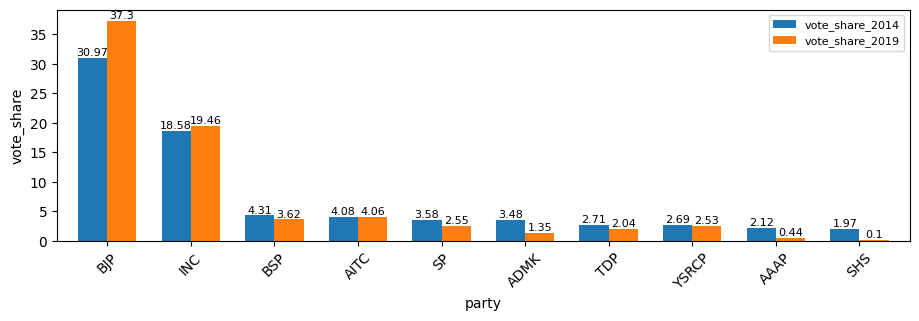

In [50]:


df_bar=df_combine_vote_share.head(10)

ax=df_bar.plot(kind='bar',x='party',figsize=(11,3),width=0.7) #df_bar.plot()--->in Pandas,.plot() is method that belongs to dataframe class
for x in ax.containers:
    ax.bar_label(x, labels=x.datavalues,fontsize=8)
plt.legend(loc='upper right',prop={'size':8})
plt.ylabel('vote_share')
plt.xticks(rotation=45)
plt.show()
#ax: This is an instance of the matplotlib.axes._axes.Axes class, which represents the area of the plot where data is visualized.
 #It controls everything about the plot, including axes, labels, ticks, the plot type (e.g., bar chart, line chart), legends, 
#and more.
#When you create a plot using Pandas (df_bar.plot()), the underlying plotting is done using Matplotlib.
#This plot() method returns the Axes object, which is then stored in ax.

**Q-7) List top 5 constituencies for two major national parties where they have gained vote
share in 2019 as compared to 2014.**

In [51]:
#vote share in 2014

df_major_14=df[(df['party']=='BJP') & (df['year'] == 2014)]

df_major_14_group=df_major_14.groupby(['state','pc_name','party'])
list_major2_14=[]
for (state,pc_name,party),j in df_major_14_group:
    vote_share=round(((j['total_votes'].max()*100)/(j['total_electors'].max())),2)
    list_major2_14.append((state,pc_name,party,vote_share))

list_major2_14_df=pd.DataFrame(list_major2_14,columns=['state','pc_name','party','vote_share_2014'])
list_major2_14_df


#vote share in 2019

df_major_19=df[(df['party']=='BJP') & (df['year'] == 2019)]

df_major_19_group=df_major_19.groupby(['state','pc_name','party'])
list_major2_19=[]
for (state,pc_name,party),j in df_major_19_group:
    vote_share=round(((j['total_votes'].max()*100)/(j['total_electors'].max())),2)
    list_major2_19.append((state,pc_name,party,vote_share))

list_major2_19_df=pd.DataFrame(list_major2_19,columns=['state','pc_name','party','vote_share_2019'])
list_major2_19_df


df_merge_bjp=pd.merge(list_major2_14_df,list_major2_19_df,on=['state','pc_name','party'])
df_merge_bjp['vote_share_gain']=df_merge_bjp['vote_share_2019']-df_merge_bjp['vote_share_2014']
df_merge_bjp_sort=df_merge_bjp.sort_values(by='vote_share_gain',ascending=False)
(df_merge_bjp_sort.reset_index(drop=True)).head(5)


,state,pc_name,party,vote_share_2014,vote_share_2019,vote_share_gain
0,Tripura,Tripura West,BJP,4.38,42.39,38.01
1,West Bengal,Purulia,BJP,5.86,40.59,34.73
2,Tripura,Tripura East,BJP,5.32,38.21,32.89
3,West Bengal,Ranaghat,BJP,14.58,44.45,29.87
4,West Bengal,Jhargram,BJP,8.30,38.16,29.86


In [52]:
#vote share in 2014
df_major_14=df[(df['party']=='INC') & (df['year'] == 2014)]

df_major_14_group=df_major_14.groupby(['state','pc_name','party'])
list_major2_14=[]
for (state,pc_name,party),j in df_major_14_group:
    vote_share=round(((j['total_votes'].max()*100)/(j['total_electors'].max())),2)
    list_major2_14.append((state,pc_name,party,vote_share))

list_major2_14_df=pd.DataFrame(list_major2_14,columns=['state','pc_name','party','vote_share_2014'])
list_major2_14_df

#vote share in 2019
df_major_19=df[(df['party']=='INC') & (df['year'] == 2019)]

df_major_19_group=df_major_19.groupby(['state','pc_name','party'])
list_major2_19=[]
for (state,pc_name,party),j in df_major_19_group:
    vote_share=round(((j['total_votes'].max()*100)/(j['total_electors'].max())),2)
    list_major2_19.append((state,pc_name,party,vote_share))

list_major2_19_df=pd.DataFrame(list_major2_19,columns=['state','pc_name','party','vote_share_2019'])
list_major2_19_df


df_merge_INC=pd.merge(list_major2_14_df,list_major2_19_df,on=['state','pc_name','party'])
df_merge_INC['vote_share_gain']=df_merge_INC['vote_share_2019']-df_merge_INC['vote_share_2014']
df_merge_INC_sort=df_merge_INC.sort_values(by='vote_share_gain',ascending=False)
(df_merge_INC_sort.reset_index(drop=True)).head(5)


,state,pc_name,party,vote_share_2014,vote_share_2019,vote_share_gain
0,Tamil Nadu,Karur,INC,2.35,50.15,47.80
1,Tamil Nadu,Arani,INC,2.02,42.63,40.61
2,Tamil Nadu,Tiruchirappalli,INC,3.72,41.17,37.45
3,Tamil Nadu,Krishnagiri,INC,2.82,39.94,37.12
4,Tamil Nadu,Thiruvallur,INC,2.58,39.41,36.83


**Q-8) List top 5 constituencies for two major national parties where they have lost vote
share in 2019 as compared to 2014.**

In [53]:
#vote share in 2014

df_major_14=df[(df['party']=='BJP') & (df['year'] == 2014)]

df_major_14_group=df_major_14.groupby(['state','pc_name','party'])
list_major2_14=[]
for (state,pc_name,party),j in df_major_14_group:
    vote_share=round(((j['total_votes'].max()*100)/(j['total_electors'].max())),2)
    list_major2_14.append((state,pc_name,party,vote_share))

list_major2_14_df=pd.DataFrame(list_major2_14,columns=['state','pc_name','party','vote_share_2014'])
list_major2_14_df


#vote share in 2019

df_major_19=df[(df['party']=='BJP') & (df['year'] == 2019)]

df_major_19_group=df_major_19.groupby(['state','pc_name','party'])
list_major2_19=[]
for (state,pc_name,party),j in df_major_19_group:
    vote_share=round(((j['total_votes'].max()*100)/(j['total_electors'].max())),2)
    list_major2_19.append((state,pc_name,party,vote_share))

list_major2_19_df=pd.DataFrame(list_major2_19,columns=['state','pc_name','party','vote_share_2019'])
list_major2_19_df


df_merge_bjp=pd.merge(list_major2_14_df,list_major2_19_df,on=['state','pc_name','party'])
df_merge_bjp['vote_share_loss']=df_merge_bjp['vote_share_2019']-df_merge_bjp['vote_share_2014']
df_merge_bjp_sort=df_merge_bjp.sort_values(by='vote_share_loss',ascending=True)
(df_merge_bjp_sort.reset_index(drop=True)).head(5)


,state,pc_name,party,vote_share_2014,vote_share_2019,vote_share_loss
0,Andhra Pradesh,Narsapuram,BJP,40.78,0.86,-39.92
1,Andhra Pradesh,Tirupati,BJP,34.49,0.98,-33.51
2,Andhra Pradesh,Visakhapatnam,BJP,32.90,1.85,-31.05
3,Daman & Diu,Daman & diu,BJP,41.99,30.88,-11.11
4,Maharashtra,Sangli,BJP,37.08,28.14,-8.94


In [54]:
#vote share in 2014
df_major_14=df[(df['party']=='INC') & (df['year'] == 2014)]

df_major_14_group=df_major_14.groupby(['state','pc_name','party'])
list_major2_14=[]
for (state,pc_name,party),j in df_major_14_group:
    vote_share=round(((j['total_votes'].max()*100)/(j['total_electors'].max())),2)
    list_major2_14.append((state,pc_name,party,vote_share))

list_major2_14_df=pd.DataFrame(list_major2_14,columns=['state','pc_name','party','vote_share_2014'])
list_major2_14_df

#vote share in 2019
df_major_19=df[(df['party']=='INC') & (df['year'] == 2019)]

df_major_19_group=df_major_19.groupby(['state','pc_name','party'])
list_major2_19=[]
for (state,pc_name,party),j in df_major_19_group:
    vote_share=round(((j['total_votes'].max()*100)/(j['total_electors'].max())),2)
    list_major2_19.append((state,pc_name,party,vote_share))

list_major2_19_df=pd.DataFrame(list_major2_19,columns=['state','pc_name','party','vote_share_2019'])
list_major2_19_df


df_merge_INC=pd.merge(list_major2_14_df,list_major2_19_df,on=['state','pc_name','party'])
df_merge_INC['vote_share_loss']=df_merge_INC['vote_share_2019']-df_merge_INC['vote_share_2014']
df_merge_INC_sort=df_merge_INC.sort_values(by='vote_share_loss',ascending=True)
(df_merge_INC_sort.reset_index(drop=True)).head(5)


,state,pc_name,party,vote_share_2014,vote_share_2019,vote_share_loss
0,Maharashtra,Ratnagiri - sindhudurg,INC,25.09,4.35,-20.74
1,Maharashtra,Aurangabad,INC,22.58,4.87,-17.71
2,Arunachal Pradesh,ARUNACHAL WEST,INC,28.58,10.99,-17.59
3,West Bengal,Raiganj,INC,22.77,5.22,-17.55
4,Manipur,Outer manipur,INC,32.29,14.92,-17.37


**Q-9) Which constituency has voted the most for NOTA?**

In [55]:
df_nota=df[df['party']=='NOTA']
df_nota_vote=df_nota.groupby(['year','state','pc_name'])

list_note=[]
for (year,state,pc_name),j in df_nota_vote:
    nota_total=j['total_votes'].sum()
    list_note.append((year,state,pc_name,nota_total))

df_nota_order=pd.DataFrame(list_note,columns=['year','state','pc_name','total_NOTA_votes'])
df_nota_order_sort=df_nota_order.sort_values(by='total_NOTA_votes',ascending=False)
(df_nota_order_sort.reset_index(drop=True)).head(5)

,year,state,pc_name,total_NOTA_votes
0,2019,Bihar,Gopalganj (SC),51660
1,2019,Andhra Pradesh,Aruku,47977
2,2014,Tamil Nadu,Nilgiris,46559
3,2019,Bihar,Paschim Champaran,45699
4,2019,Odisha,Nabarangpur,44582


**Q-10) What is the voting percentage in various states in 2014 and 2019?**


In [56]:

list_states_pct_2014=[]
df_states_pct_2014=(df[df['year']==2014]).groupby('state')
total_registered_voters=0
for state,j in df_states_pct_2014:
    variable=0
    jj=j.groupby('pc_name')
    
    for t,k in jj:
       
        variable=variable+k['total_electors'].max()
        
    vote_pct_14=round(((j['total_votes'].sum()*100)/variable),2)
    list_states_pct_2014.append((state,round((variable/1000000),2),vote_pct_14))
    

df_state_wise_voting_pct_14=pd.DataFrame(list_states_pct_2014,columns=['state','total_registered_voters_2014(Millions)','voting_percentage_2014'])
df_state_wise_voting_pct_14
    

,state,total_registered_voters_2014(Millions),voting_percentage_2014
0,Andaman & Nicobar Islands,0.27,70.66
1,Andhra Pradesh,36.76,78.71
2,Arunachal Pradesh,0.76,78.61
3,Assam,18.84,80.08
4,Bihar,63.80,56.25
5,Chandigarh,0.62,73.71
6,Dadra & Nagar Haveli,0.20,84.07
7,Daman & Diu,0.11,78.01
8,Goa,1.06,77.02
9,Gujarat,40.60,63.60


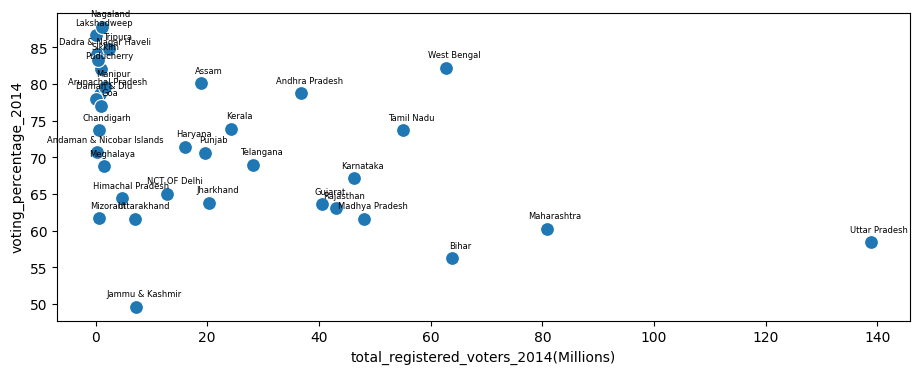

In [57]:
plt.figure(figsize=(11,4))
ax=sns.scatterplot(data=df_state_wise_voting_pct_14,x='total_registered_voters_2014(Millions)',
                   y='voting_percentage_2014',s=100)





for i, row in df_state_wise_voting_pct_14.iterrows():
    #iterrows() will give index number in i, and series object for each row in 'row variable'. And when a row of dataframe
    #is converted into series object, then 'column name' becomes index.
    
    ax.annotate(row['state'], 
                (row['total_registered_voters_2014(Millions)'], row['voting_percentage_2014']),textcoords="offset points", 
                xytext=(6,6), ha='center',va='bottom',fontsize=6) 
                
   
    
plt.show()

In [58]:
list_voting_percenatage_19=[]
df_state_vote_pct_19=(df[df['year']==2019]).groupby('state')
for i,j in df_state_vote_pct_19:
    tot_votes=j['total_votes'].sum()
    tot_electors=0
    new_df=j.groupby('pc_name')
    for t,k in new_df:
        tot_electors=tot_electors+k['total_electors'].max()
    vot_pct=round(((tot_votes*100)/tot_electors),2)
    list_voting_percenatage_19.append((i,round((tot_electors/1000000),2),vot_pct))
df_state_19_voting_pct=pd.DataFrame(list_voting_percenatage_19,columns=['state','total_registered_voters_2019_(millions)','voting_percentage_2019'])
df_state_19_voting_pct_sort=df_state_19_voting_pct.sort_values(by='voting_percentage_2019',ascending=False)
df_state_19_voting_pct_sort_=df_state_19_voting_pct_sort.reset_index(drop=True)
df_state_19_voting_pct_sort_.head(2)

,state,total_registered_voters_2019_(millions),voting_percentage_2019
0,Lakshadweep,0.06,85.18
1,Nagaland,1.21,82.91


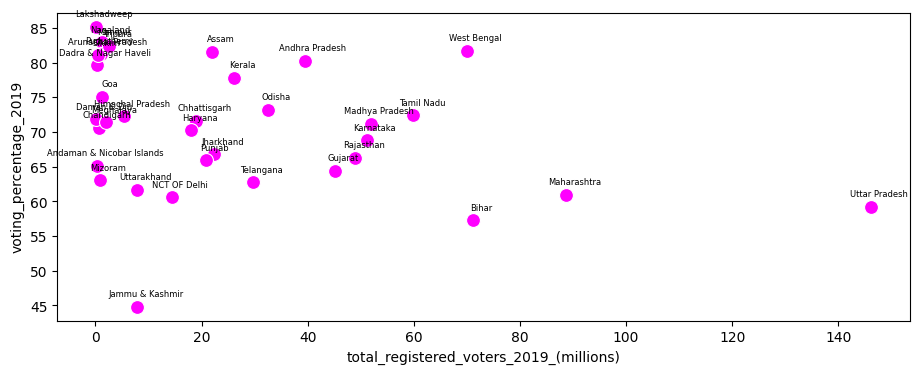

In [59]:
plt.figure(figsize=(11,4))
ax=sns.scatterplot(data=df_state_19_voting_pct,
                   x='total_registered_voters_2019_(millions)',
                   y='voting_percentage_2019',s=100,color='magenta')

for i,row in df_state_19_voting_pct.iterrows():
    ax.annotate(row['state'],(row['total_registered_voters_2019_(millions)'],row['voting_percentage_2019']),
                textcoords='offset points',xytext=(6,6),ha='center',va='bottom',fontsize=6)
    

In [60]:
df.head(3)

,year,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,2014,Telangana,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282
1,2014,Telangana,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282
2,2014,Telangana,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,184198,1386282


**2014 Winner Candidate Age Bracket**

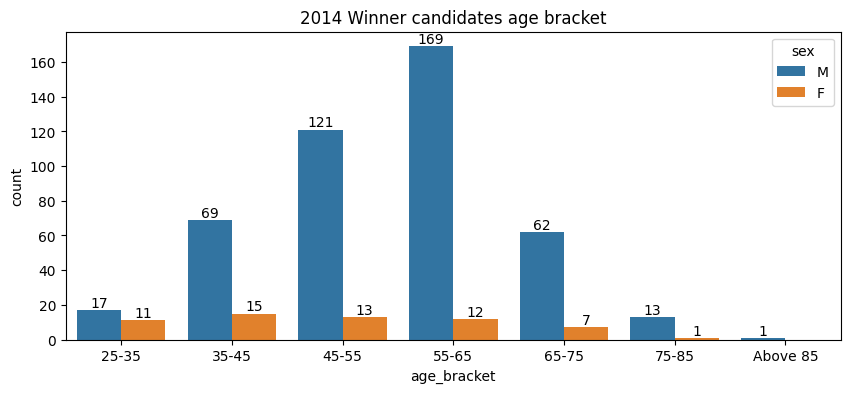

In [61]:
df_age=df[df['year']==2014].groupby(['state','pc_name'])
list_age=[]
for (state,pc_name),j in df_age:
    y=j[j['total_votes']==(j['total_votes'].max())][['sex','age']]
    list_age.append((state,pc_name,y['sex'].iloc[0],y['age'].iloc[0]))

df_winner_age_bracket=pd.DataFrame(list_age,columns=['state','pc_name','sex','age'])
df_winner_age_bracket['age']=df_winner_age_bracket['age'].astype('Int64')

def age_bracket(row):              # here every row of df_winner_age_bracket is being passed as series object in parameter 
                                    #'row' of method/function age_bracket. So when each row is converted into series object, 
                                     #column name becomes index.
                                     #It is similar to obtaining series object y=df.iloc[0](here y is a series object.Learn iloc
                                      #in notes
    if (row['age']>=25)&(row['age']<35):
        return '25-35'
    elif (row['age']>=35)&(row['age']<45):
        return'35-45'
    elif (row['age']>=45)&(row['age']<55):
        return'45-55'
    elif (row['age']>=55)&(row['age']<65):
        return'55-65'
    elif (row['age']>=65)&(row['age']<75):
        return'65-75'
    elif (row['age']>=75)&(row['age']<85):
        return'75-85'
    else:
        return 'Above 85'
        
        
df_winner_age_bracket['age_bracket']=df_winner_age_bracket.apply(age_bracket,axis=1)
age_bracket_order = ['25-35', '35-45', '45-55', '55-65', '65-75','75-85','Above 85']
plt.figure(figsize=(10,4))
plt.title("2014 Winner candidates age bracket")
ax=sns.countplot(data=df_winner_age_bracket,x='age_bracket',hue='sex',order=age_bracket_order)

for x in ax.containers:
    ax.bar_label(x)
plt.show()



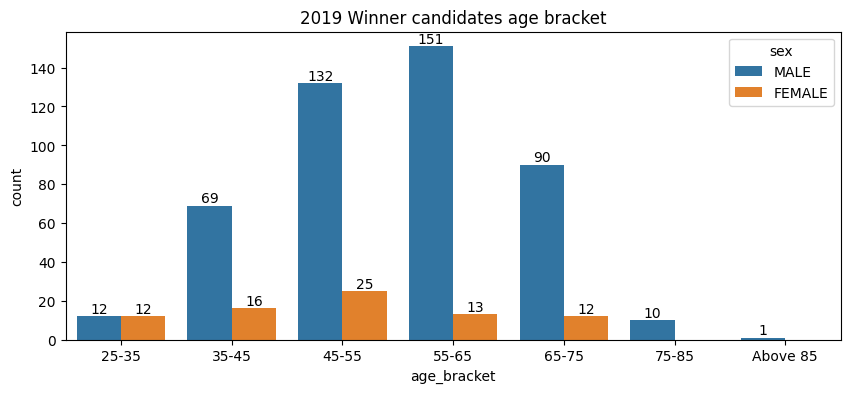

In [62]:
df_age=df[df['year']==2019].groupby(['state','pc_name'])
list_age=[]
for (state,pc_name),j in df_age:
    y=j[j['total_votes']==(j['total_votes'].max())][['sex','age']]
    list_age.append((state,pc_name,y['sex'].iloc[0],y['age'].iloc[0]))

df_winner_age_bracket=pd.DataFrame(list_age,columns=['state','pc_name','sex','age'])
df_winner_age_bracket['age']=df_winner_age_bracket['age'].astype('Int64')

def age_bracket(row):              # here every row of df_winner_age_bracket is being passed as series object in parameter 
                                    #'row' of method/function age_bracket. So when each row is converted into series object, 
                                     #column name becomes index.
                                     #It is similar to obtaining series object y=df.iloc[0](here y is a series object.Learn iloc
                                      #in notes
    if (row['age']>=25)&(row['age']<35):
        return '25-35'
    elif (row['age']>=35)&(row['age']<45):
        return'35-45'
    elif (row['age']>=45)&(row['age']<55):
        return'45-55'
    elif (row['age']>=55)&(row['age']<65):
        return'55-65'
    elif (row['age']>=65)&(row['age']<75):
        return'65-75'
    elif (row['age']>=75)&(row['age']<85):
        return'75-85'
    else:
        return 'Above 85'
        
        
df_winner_age_bracket['age_bracket']=df_winner_age_bracket.apply(age_bracket,axis=1)
age_bracket_order = ['25-35', '35-45', '45-55', '55-65', '65-75','75-85','Above 85']
plt.figure(figsize=(10,4))
plt.title("2019 Winner candidates age bracket")
ax=sns.countplot(data=df_winner_age_bracket,x='age_bracket',hue='sex',order=age_bracket_order)

for x in ax.containers:
    ax.bar_label(x)
plt.show()

**Seats won by top 10 parties in 2014 and 2019**

In [113]:
df_seat_won=df.groupby(['year','state','pc_name'])

list_seat_won=[]
for (year,state,pc_name),j in df_seat_won:
    x=j[j['total_votes']==j['total_votes'].max()]
    list_seat_won.append((year,state,pc_name,x['party'].iloc[0]))

df_seat_won_party=pd.DataFrame(list_seat_won,columns=['year','state','pc_name','party'])

df_seat_won_party_2014=df_seat_won_party[df_seat_won_party['year']==2014]
df_seat_won_party_2019=df_seat_won_party[df_seat_won_party['year']==2019]
winner_2014=(df_seat_won_party_2014['party'].value_counts()).reset_index()
winner_2019=(df_seat_won_party_2019['party'].value_counts()).reset_index()

df_winner_2014_2019=pd.merge(winner_2014,winner_2019,on='party',how='outer')


df_winner_2014_2019.rename(columns=
                           {'party':'Winner party','count_x':'candidates won in 2014','count_y':'candidates won in 2019'},
                           inplace=True)
df_winner_2014_2019['candidates won in 2014']=df_winner_2014_2019['candidates won in 2014'].astype('Int64')
df_winner_2014_2019['candidates won in 2019']=df_winner_2014_2019['candidates won in 2019'].astype('Int64')
df_winner_2014_2019.fillna(0)






,Winner party,candidates won in 2014,candidates won in 2019
0,BJP,271,303
1,INC,43,52
2,ADMK,37,1
3,AITC,34,22
4,SHS,18,18
5,TDP,16,3
6,TRS,11,9
7,CPM,9,0
8,YSRCP,9,22
9,LJP,6,6


In [114]:
df

,year,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,2014,Telangana,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282
1,2014,Telangana,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282
2,2014,Telangana,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,184198,1386282
3,2014,Telangana,Adilabad,RATHOD SADASHIV,M,55.0,ST,BSP,Elephant,94363,57,94420,1386282
4,2014,Telangana,Adilabad,NETHAWATH RAMDAS,M,44.0,ST,IND,Auto- Rickshaw,41028,4,41032,1386282
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16947,2019,Puducherry,Puducherry,TIRAVITAMANKAI@LOURDHUMARY,FEMALE,57.0,GENERAL,IND,Slate,870,0,870,973410
16948,2019,Puducherry,Puducherry,IMS. BALAJI,MALE,32.0,GENERAL,IND,Bat,2546,0,2546,973410
16949,2019,Puducherry,Puducherry,RAMESH.D,MALE,49.0,SC,IND,Mike,1653,0,1653,973410
16950,2019,Puducherry,Puducherry,V. RAMAMURTHI,MALE,74.0,GENERAL,IND,Whistle,641,1,642,973410
